# Uber Data

All trips, starting November 2018, reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of routine reporting required by ordinance.
Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Fares are rounded to the nearest $2.50 and tips are rounded to the nearest $1.00.
For a discussion of the approach to privacy in this dataset, please see http://dev.cityofchicago.org/open%20data/data%20portal/2019/04/12/tnp-taxi-privacy.html.

## Wrangle DataFrame

The following imports are standard for Python Jupyter Notebooks. We need pandas for to hold and view the data, numpy to do statistics, and pyplot to create graphs. It's a good habit to always import all 3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Project: Part 1

First we need to access the data. This is a very large dataset. It can take some time to try and download it all. Note that nrows=50000. This means that we are limiting our results to 50,000 rows.

Also, notice the parse_dates=['Trip Start Timestamp', 'Trip End Timestamp']. This is very important. It allows us to treat these columns as dates. We need this to easily compute the day of the trip, and the hour.

df is standard terminology. It stands for dataFrame.

In [80]:
def every_n_numbers(n, limit):

    x = []
    for i in range(limit):
        if i%n == 0:
            x.append(i)
    
    return x
    

In [83]:
def skip_every_n_numbers(n, limit):

    x = []
    for i in range(limit):
        if i%n != 0:
            x.append(i)
    
    return x

In [ ]:
df = pd.read_csv('Transportation_Network_Providers_-_Trips.csv', skiprows=skip_every_n_numbers(1000, 50000))

In [12]:
pd_read()

In [13]:
df = pd.read_csv('uber_random_50k.csv', header=0, nrows=50000, parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

Now that we have loaded the data uploaded into our dataFrame, df, there's a lot that we can do with it. The first thing I like to do is see the data itself. We can use .head() to look at the first 5 rows.

In [51]:
df = pd.read_csv('uber_every_1K_rows.csv', parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

In [52]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,10c7f5b6e72604b2d61676539c794cae46a7892a,2019-01-11 20:00:00,2019-01-11 20:15:00,878.0,4.5,NaN,NaN,43.0,51.0,10.0,...,2.55,12.55,False,1,41.761578,-87.572782,POINT (-87.5727819867 41.7615779081),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
1,10c9d0549abb476c40d28b6e8655236fc5c8337c,2019-01-04 03:15:00,2019-01-04 03:30:00,788.0,4.9,NaN,NaN,7.0,8.0,10.0,...,2.55,12.55,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,10cbc009f37188202e8cfaddcc8c9ebbccc78b06,2018-12-04 02:30:00,2018-12-04 02:45:00,862.0,6.5,NaN,NaN,39.0,32.0,10.0,...,2.50,13.50,False,1,41.808916,-87.596183,POINT (-87.5961833442 41.8089162826),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
3,10cda8e401a74790b1deb7a9de194bf526b28fcc,2019-01-14 04:15:00,2019-01-14 04:15:00,708.0,2.6,1.703184e+10,1.703184e+10,34.0,31.0,7.5,...,0.00,7.50,True,1,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),41.847432,-87.663529,POINT (-87.6635286858 41.8474315472)
4,10cfaf1cb74d19ac8e71937512b7b526df49cb2c,2018-11-05 00:30:00,2018-11-05 00:45:00,539.0,1.9,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,2.50,7.50,False,1,41.914586,-87.645966,POINT (-87.6459662069 41.9145857091),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)


Take a moment to examine the data. Lots of interesting stuff. Notice the NaN values? These need to be dealt with. First, let's analyze the data using .describe()

In [53]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,45335.000000,45338.000000,3.277200e+04,3.261500e+04,42630.000000,42319.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,42663.000000,42663.000000,42339.000000,42339.000000
mean,1050.394993,5.843617,1.703136e+10,1.703138e+10,25.295825,25.873083,10.778541,0.522740,2.802098,14.103380,1.329481,41.892467,-87.665717,41.893435,-87.667936
std,736.613534,6.347701,3.326601e+05,3.383880e+05,20.164720,20.552015,8.898413,1.501123,1.862349,10.541434,0.806980,0.061407,0.059872,0.061396,0.063759
min,3.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,527.000000,1.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.500000,7.550000,1.000000,41.877406,-87.679955,41.878667,-87.683227
50%,854.000000,3.600000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.000000,2.550000,10.050000,1.000000,41.893216,-87.652274,41.893216,-87.651970
75%,1378.000000,7.300000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.000000,2.550000,15.500000,1.000000,41.929078,-87.631864,41.930579,-87.631864
max,9154.000000,151.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,170.000000,31.000000,20.950000,206.890000,14.000000,42.021224,-87.534903,42.021224,-87.530712


.describe() shows the count, the quartiles, and the median mean. It's always a good idea to compare the median and the mean. Note that the mean is usually greater than the median in this dataset. This indicates that most of the data is very right skewed. This can happen when most of the data is clustered around 0, and the mean is pulled away from the median by very high outliers. 

For instance, the median trip is 3.6 miles, but the max trip is almost 246 miles. 

(Recall that the median is equal to the "50%" row.)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 21 columns):
Trip ID                       45338 non-null object
Trip Start Timestamp          45338 non-null datetime64[ns]
Trip End Timestamp            45338 non-null datetime64[ns]
Trip Seconds                  45335 non-null float64
Trip Miles                    45338 non-null float64
Pickup Census Tract           32772 non-null float64
Dropoff Census Tract          32615 non-null float64
Pickup Community Area         42630 non-null float64
Dropoff Community Area        42319 non-null float64
Fare                          45338 non-null float64
Tip                           45338 non-null int64
Additional Charges            45338 non-null float64
Trip Total                    45338 non-null float64
Shared Trip Authorized        45338 non-null bool
Trips Pooled                  45338 non-null int64
Pickup Centroid Latitude      42663 non-null float64
Pickup Centroid Longitude     42663 n

Whereas .describe() shows statistics for the numerical columns, .info() shows all the columns and it reveals the null values. Whenever the non-null count is below 50000, there are are null values in those columns.

There are many options for treating null values. The easiest is to get rid of them completely. This may not be possible if there are too many null values. Since our dataset is fairly large to begin with, we will take the easiest approach.

In [55]:
df = df.dropna(how='any',axis=0) 

## Visual Graphs

#### Histograms

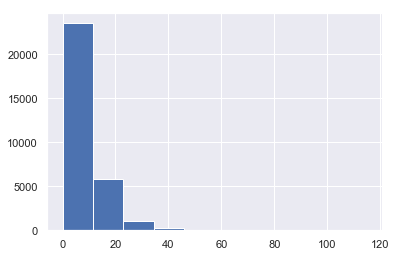

In [56]:
plt.hist(df['Fare'])
plt.show()

In [57]:
import seaborn as sns;

# Set up seaborn dark grid
sns.set()

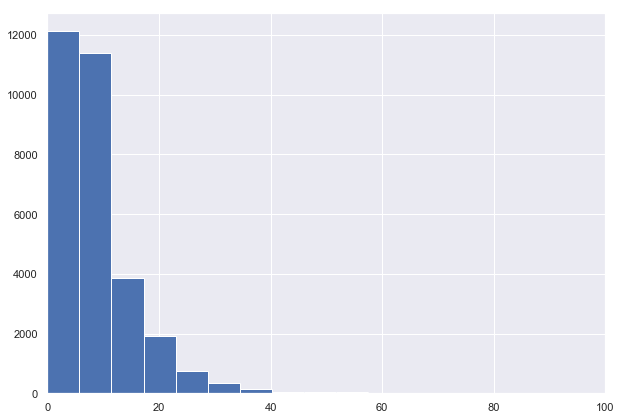

In [58]:
plt.figure(figsize=(10,7))
plt.xlim(0,100)
plt.hist(df['Fare'], bins=20)
plt.show()

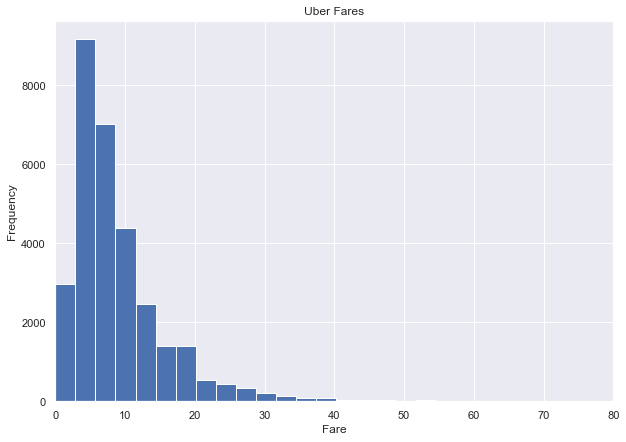

In [59]:
plt.figure(figsize=(10,7))
plt.xlim(0,80)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Uber Fares')
plt.hist(df['Fare'], bins=40)
plt.show()

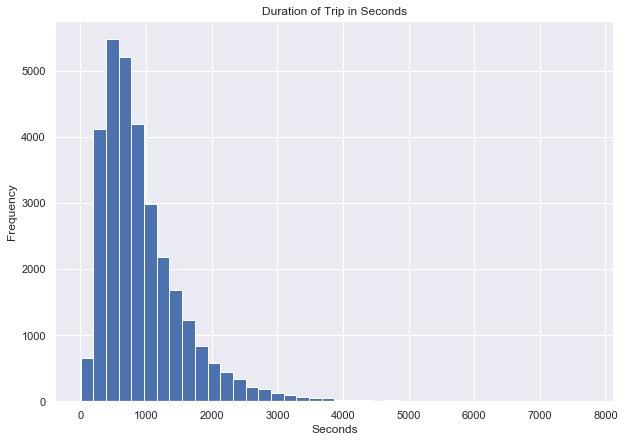

In [60]:
plt.figure(figsize=(10,7))
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Duration of Trip in Seconds')
plt.hist(df['Trip Seconds'], bins=40)
plt.show()

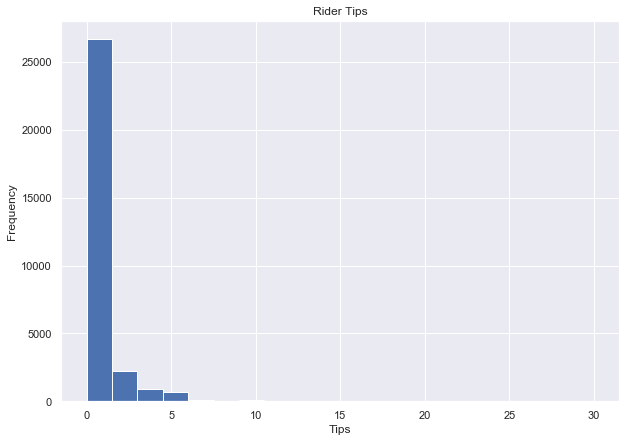

In [61]:
plt.figure(figsize=(10,7))
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Rider Tips')
plt.hist(df['Tip'], bins=20)
plt.show()

#### Box Plots

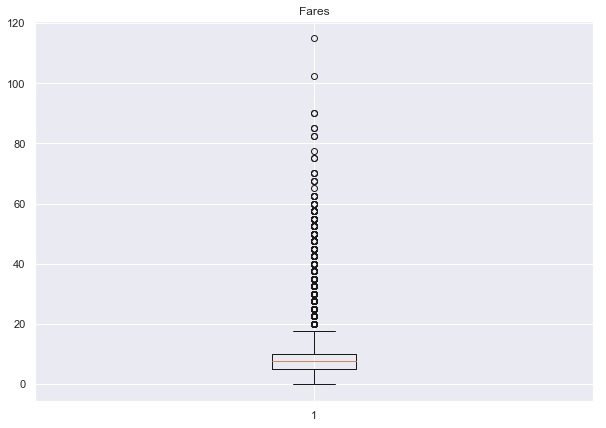

In [62]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares')
plt.show()

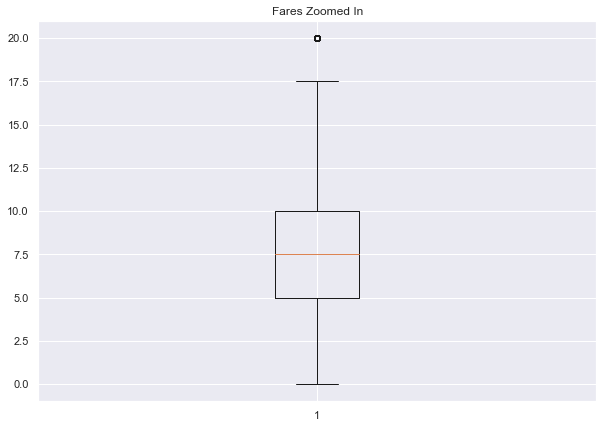

In [63]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares Zoomed In')
plt.ylim(-1,21)
plt.show()

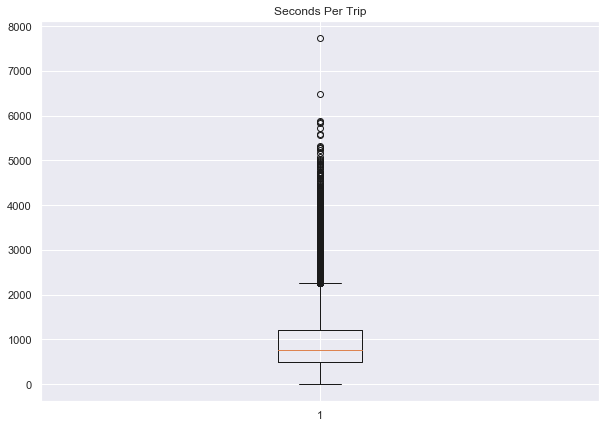

In [64]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Trip Seconds'])
plt.title('Seconds Per Trip')
plt.show()

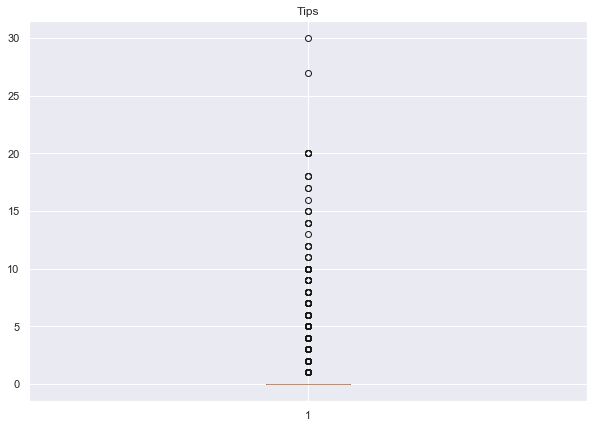

In [65]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Tip'])
plt.title('Tips')
plt.show()

#### Scatter Plots

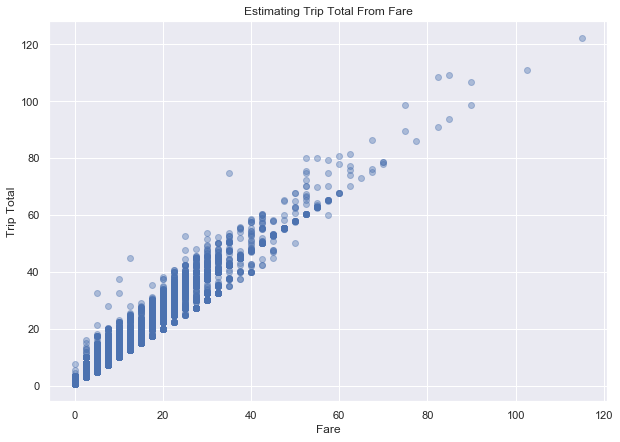

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.show()

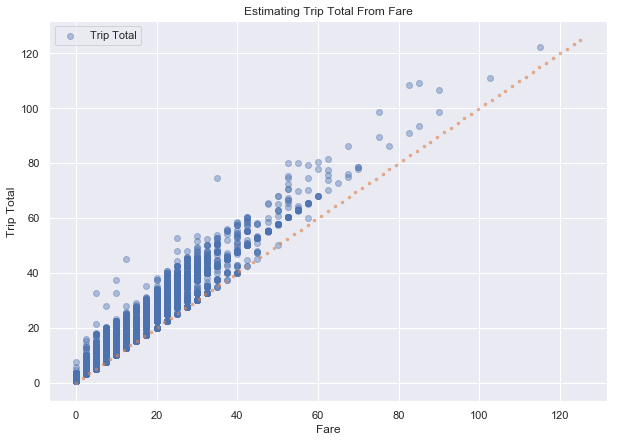

In [67]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
x = np.linspace(0,125,75)
y = x
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.scatter(x, y, alpha=0.6, marker=".", linewidths=0.5)
plt.legend(loc='upper left')
plt.show()

Hypothesis: Riders who take longer trips are more likely to tip.

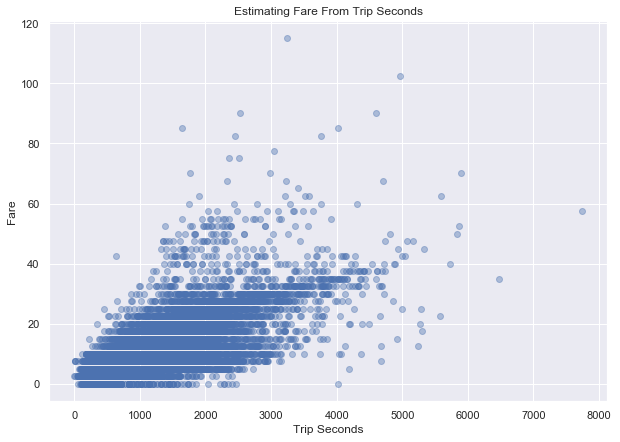

In [68]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Seconds'], df['Fare'], alpha = 0.4)
plt.ylabel('Fare')
plt.xlabel('Trip Seconds')
plt.title('Estimating Fare From Trip Seconds')
plt.show()

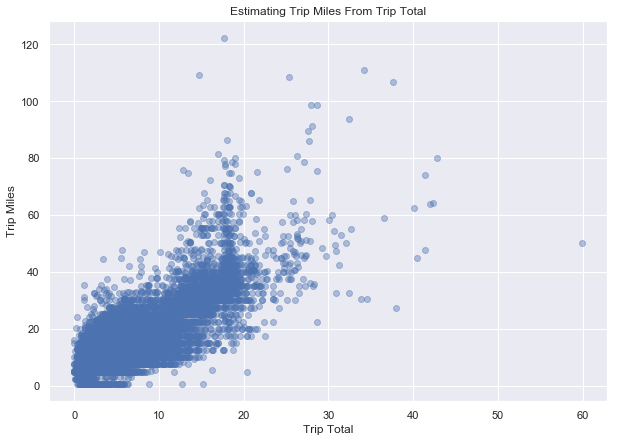

In [69]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Miles'], df['Trip Total'], alpha = 0.4)
plt.ylabel('Trip Miles')
plt.xlabel('Trip Total')
plt.title('Estimating Trip Miles From Trip Total')
plt.show()

## Project: Part 2

#### Tips

In [70]:
# Stats on Tips
df['Tip'].describe()

count    30804.000000
mean         0.479775
std          1.323945
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: Tip, dtype: float64

Ouch.

In [71]:
# New df on tippers
df_tippers = df.loc[df['Tip'] != 0.0]

In [72]:
# Stats on tippers
df_tippers['Tip'].describe()

count    5642.000000
mean        2.619461
std         1.991383
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: Tip, dtype: float64

In [73]:
# Probability of getting a tip
df_tippers.Tip.count() / df.Tip.count()

0.18315803142449033

Check to see if riders tip more in certain areas.

In [74]:
# Find mean tip in community areas
df_community_mean = df.groupby(['Pickup Community Area']).mean()

# Show results
df_community_mean.sort_values(by=['Tip'], ascending=False).head(10)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
Pickup Community Area,,,,,,,,,,,,,,,
76.0,2254.239826,17.394913,1.703197e+10,1.703130e+10,19.170058,27.685320,1.709302,7.300044,36.694666,0.127907,1.143895,41.979225,-87.901169,41.907323,-87.653714
56.0,1762.446565,12.819847,1.703197e+10,1.703133e+10,22.122137,20.677481,1.595420,7.434809,29.707710,0.091603,1.167939,41.786370,-87.751267,41.888061,-87.640635
11.0,1176.161290,6.019355,1.703111e+10,1.703125e+10,16.258065,11.290323,0.967742,2.525806,14.783871,0.290323,1.290323,41.978388,-87.767061,41.945171,-87.719304
17.0,1367.809524,6.738095,1.703117e+10,1.703131e+10,23.095238,12.261905,0.761905,2.404762,15.428571,0.238095,1.428571,41.945586,-87.798936,41.934547,-87.725919
10.0,1283.153846,7.446154,1.703110e+10,1.703129e+10,20.384615,11.923077,0.653846,2.921923,15.498846,0.423077,1.538462,41.988744,-87.798432,41.956626,-87.755044
41.0,1064.136364,6.220356,1.703153e+10,1.703148e+10,34.745059,10.676877,0.620553,2.515277,13.812708,0.290514,1.403162,41.794433,-87.593463,41.842704,-87.629559
18.0,1027.153846,5.676923,1.703158e+10,1.703143e+10,19.846154,10.961538,0.615385,2.338462,13.915385,0.230769,1.000000,41.929011,-87.797999,41.919511,-87.731196
13.0,1278.847826,5.976087,1.703159e+10,1.703128e+10,16.369565,9.836957,0.586957,2.254348,12.678261,0.456522,1.760870,41.981578,-87.717472,41.941126,-87.687105
33.0,937.921123,4.297995,1.703142e+10,1.703146e+10,27.477273,9.321524,0.582888,3.286029,13.190441,0.232620,1.287433,41.857690,-87.619597,41.881268,-87.648377


In [75]:
# Show sample of riders that make mean
df.groupby(['Pickup Community Area']).count()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
Pickup Community Area,,,,,,,,,,,,,,,,,,,,
1.0,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284
2.0,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
3.0,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792
4.0,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
5.0,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393
6.0,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609
7.0,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306
8.0,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754
9.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [76]:
# Show community areas with most rides
df.groupby(['Pickup Community Area']).count().sort_values(by=['Tip'], ascending=False).head(10)

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
Pickup Community Area,,,,,,,,,,,,,,,,,,,,
8.0,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754
32.0,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495
28.0,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470,3470
6.0,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609
24.0,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395
7.0,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306,2306
22.0,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317
3.0,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792
33.0,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748


In [77]:
# Use large samples of greater than 30 only
df_community_mean_large_sample = df_community_mean[df.groupby(['Pickup Community Area']).count()>=30]

# Show results
df_community_mean_large_sample.head(10)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
Pickup Community Area,,,,,,,,,,,,,,,
1.0,1110.063380,5.582746,1.703112e+10,1.703121e+10,16.957746,9.973592,0.538732,2.529296,13.041620,0.313380,1.496479,42.008074,-87.668325,41.955540,-87.671408
2.0,1174.772455,5.545509,1.703102e+10,1.703124e+10,16.227545,9.775449,0.311377,2.245808,12.332635,0.443114,1.622754,41.998537,-87.691443,41.952305,-87.675170
3.0,959.489899,4.823106,1.703114e+10,1.703127e+10,18.508838,9.261364,0.481061,2.441086,12.183510,0.257576,1.349747,41.965058,-87.657731,41.929735,-87.662210
4.0,1019.435976,4.603049,1.703113e+10,1.703126e+10,18.137195,9.504573,0.509146,2.576799,12.590518,0.237805,1.304878,41.971506,-87.685603,41.941606,-87.676562
5.0,955.178117,4.147583,1.703118e+10,1.703131e+10,17.776081,9.090331,0.582697,2.569059,12.242087,0.206107,1.246819,41.948037,-87.682144,41.931214,-87.677108
6.0,898.314297,3.999693,1.703114e+10,1.703128e+10,16.420084,8.845343,0.384055,2.450977,11.680376,0.199693,1.272135,41.942852,-87.653079,41.921845,-87.660752
7.0,846.977016,3.521249,1.703119e+10,1.703131e+10,17.473547,8.348873,0.362099,2.487897,11.198868,0.173027,1.224631,41.922770,-87.647683,41.912141,-87.658622
8.0,805.073882,3.398978,1.703113e+10,1.703135e+10,20.760586,8.270654,0.465354,2.618728,11.354736,0.164495,1.205656,41.896584,-87.629637,41.900626,-87.653967
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Drop community areas with less than 30
df_community_mean_large_sample = df_community_mean_large_sample.dropna(how='any',axis=0) 

# Show results
df_community_mean_large_sample.sort_values(by=['Tip'], ascending=False).head(10)

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
Pickup Community Area,,,,,,,,,,,,,,,
76.0,2254.239826,17.394913,1.703197e+10,1.703130e+10,19.170058,27.685320,1.709302,7.300044,36.694666,0.127907,1.143895,41.979225,-87.901169,41.907323,-87.653714
56.0,1762.446565,12.819847,1.703197e+10,1.703133e+10,22.122137,20.677481,1.595420,7.434809,29.707710,0.091603,1.167939,41.786370,-87.751267,41.888061,-87.640635
11.0,1176.161290,6.019355,1.703111e+10,1.703125e+10,16.258065,11.290323,0.967742,2.525806,14.783871,0.290323,1.290323,41.978388,-87.767061,41.945171,-87.719304
41.0,1064.136364,6.220356,1.703153e+10,1.703148e+10,34.745059,10.676877,0.620553,2.515277,13.812708,0.290514,1.403162,41.794433,-87.593463,41.842704,-87.629559
13.0,1278.847826,5.976087,1.703159e+10,1.703128e+10,16.369565,9.836957,0.586957,2.254348,12.678261,0.456522,1.760870,41.981578,-87.717472,41.941126,-87.687105
33.0,937.921123,4.297995,1.703142e+10,1.703146e+10,27.477273,9.321524,0.582888,3.286029,13.190441,0.232620,1.287433,41.857690,-87.619597,41.881268,-87.648377
5.0,955.178117,4.147583,1.703118e+10,1.703131e+10,17.776081,9.090331,0.582697,2.569059,12.242087,0.206107,1.246819,41.948037,-87.682144,41.931214,-87.677108
32.0,917.091559,4.089442,1.703160e+10,1.703138e+10,23.737339,9.112303,0.576824,2.670455,12.359582,0.201717,1.280973,41.880127,-87.627371,41.894538,-87.656228
1.0,1110.063380,5.582746,1.703112e+10,1.703121e+10,16.957746,9.973592,0.538732,2.529296,13.041620,0.313380,1.496479,42.008074,-87.668325,41.955540,-87.671408


Use bootstrap functions to calculate confidence intervals

In [79]:
#Returns the result of a function, like np.mean(), for a replicate
def bootstrap_replicate_1d(data, func, data_subset):
    return func(np.random.choice(data, size=len(data_subset)))

#Calls above function to produce results of desired function, like np.mean, for all replicants
def draw_bs_reps(data, func, data_subset, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func, data_subset)

    return bs_replicates


In [80]:
def bootstrap_plot(y, data_subset, color='c', alpha=0.7, title='Mean Tip', bins=25):
    
    # Compute actual mean
    mean = y.mean()
    print("The actual mean is:", mean)

    # Take 10,000 bootstrap replicates of the mean: bs_replicates
    bs_replicates = draw_bs_reps(y, np.mean, data_subset, size=10000)
    
    # Compute bootstrapped mean
    bs_mean = bs_replicates.mean()
    print("The boostrapped mean is:", bs_mean)

    # Compute and print SEM
    sem = np.std(y) / np.sqrt(len(y))
    print("The standard error of the mean is:", sem)
    
    # Compute and print standard deviation of bootstrap replicates
    bs_std = np.std(bs_replicates)
    print("The standard deviation of the bootstrapped mean is:", bs_std)
    
    # This is a 95% Confidence Interval
    CI = np.percentile(bs_replicates,[2.5, 97.5])
    print("We are 95% confident that the true mean is captured by the following interval:", CI)
    
    # This is a 99% Confidence Interval
    CI_2 = np.percentile(bs_replicates,[0.5, 99.5])
    print("We are 99% confident that the true mean is captured by the following interval:", CI_2)

    # Make a histogram of the results
    plt.figure(figsize=(10,7))
    plt.hist(bs_replicates, bins=bins, density=True, color=color, alpha=alpha)
    plt.xlabel('Bootstrap Mean')
    plt.ylabel('PDF')
    plt.title(title, fontsize=15)
    plt.show()
    
    # Show the plot
    plt.show()
    
    return bs_replicates

The actual mean is: 0.47977535385014936
The boostrapped mean is: 0.4798374334502013
The standard error of the mean is: 0.007543262163953061
The standard deviation of the bootstrapped mean is: 0.007577892093789616
We are 95% confident that the true mean is captured by the following interval: [0.46480895 0.49464355]
We are 99% confident that the true mean is captured by the following interval: [0.45997257 0.49889641]


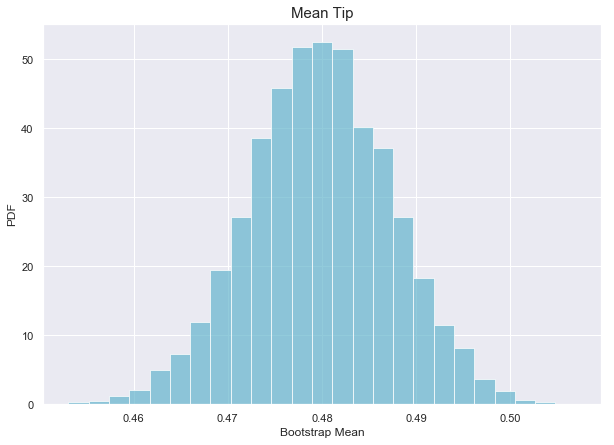

In [81]:
reps = bootstrap_plot(df['Tip'], df)

In [82]:
#Find the probability of 5
p = np.sum(reps >= 1) / len(reps)
print('Given our sample, the proability that the mean tip is greater than 1 is ', p)

Given our sample, the proability that the mean tip is greater than 1 is  0.0


In conclusion, riders in community areas 76 and 56 definitely tip more.

## Geography

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 3 to 45337
Data columns (total 21 columns):
Trip ID                       30804 non-null object
Trip Start Timestamp          30804 non-null datetime64[ns]
Trip End Timestamp            30804 non-null datetime64[ns]
Trip Seconds                  30804 non-null float64
Trip Miles                    30804 non-null float64
Pickup Census Tract           30804 non-null float64
Dropoff Census Tract          30804 non-null float64
Pickup Community Area         30804 non-null float64
Dropoff Community Area        30804 non-null float64
Fare                          30804 non-null float64
Tip                           30804 non-null int64
Additional Charges            30804 non-null float64
Trip Total                    30804 non-null float64
Shared Trip Authorized        30804 non-null bool
Trips Pooled                  30804 non-null int64
Pickup Centroid Latitude      30804 non-null float64
Pickup Centroid Longitude     30804 n

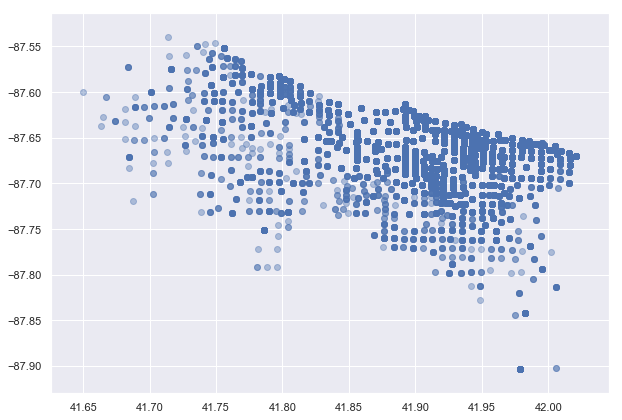

In [84]:
plt.figure(figsize=(10,7))
plt.scatter(df['Pickup Centroid Latitude'], df['Pickup Centroid Longitude'], alpha=0.4)
plt.show()

In [85]:
df[df['Pickup Community Area']==76].head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
204,12526cce1c5339d99cd9d37db835ded0aa75d46b,2019-01-17 21:15:00,2019-01-17 21:45:00,1589.0,17.4,1.703198e+10,1.703108e+10,76.0,8.0,50.0,...,7.85,57.85,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
258,12ba93840601db86d761d6ab8ee0742a563edc91,2019-02-06 22:00:00,2019-02-06 22:30:00,1517.0,16.5,1.703198e+10,1.703107e+10,76.0,7.0,25.0,...,7.55,39.55,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.922083,-87.634156,POINT (-87.6341560931 41.922082541)
410,13e0bc944020bff6cdd1fbf08025c146d4dba4be,2019-01-13 17:15:00,2019-01-13 18:00:00,2349.0,21.5,1.703198e+10,1.703133e+10,76.0,33.0,30.0,...,9.40,39.40,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
449,142cd24d7eb4f5b4c377215afdfb3badcf15322e,2018-12-08 11:45:00,2018-12-08 12:15:00,1697.0,18.0,1.703198e+10,1.703184e+10,76.0,32.0,27.5,...,7.50,35.00,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
451,1430b4bf47c617a217db6f7823d2e26f1db7b3cc,2019-03-10 19:45:00,2019-03-10 20:30:00,2235.0,17.8,1.703198e+10,1.703108e+10,76.0,8.0,32.5,...,7.55,40.05,False,1,41.979071,-87.90304,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)


In [86]:
df[df['Pickup Community Area']==56].head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
651,15b3561e293258394ad68af2f1c3705081cce69e,2018-12-17 21:15:00,2018-12-17 21:30:00,1274.0,13.4,1.703198e+10,1.703108e+10,56.0,8.0,30.0,...,7.50,37.50,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)
760,16859dbd7aaf545dede92e5a9518414e8b6807f5,2018-11-04 18:15:00,2018-11-04 19:00:00,1950.0,15.7,1.703198e+10,1.703107e+10,56.0,7.0,27.5,...,7.50,35.00,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.921778,-87.641460,POINT (-87.6414597588 41.9217783562)
1081,18efefd33e8e1d4359b2c0a17cdd6d052dc43788,2019-03-11 21:45:00,2019-03-11 22:00:00,1556.0,8.0,1.703198e+10,1.703141e+10,56.0,41.0,15.0,...,7.83,27.83,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.790567,-87.594015,POINT (-87.5940154442 41.7905666284)
1785,1e3e924f82c78a4b41bb956a04630122586bde98,2018-11-08 23:30:00,2018-11-09 00:00:00,1502.0,17.0,1.703198e+10,1.703108e+10,56.0,8.0,20.0,...,7.50,29.50,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
2415,22febd2e4b98abd389cdd88d6cc10f9567daaa2f,2018-11-02 20:30:00,2018-11-02 20:45:00,1504.0,14.5,1.703198e+10,1.703107e+10,56.0,7.0,25.0,...,7.50,32.50,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.914616,-87.631717,POINT (-87.6317173661 41.9146162864)


## Pooled Rides

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 3 to 45337
Data columns (total 21 columns):
Trip ID                       30804 non-null object
Trip Start Timestamp          30804 non-null datetime64[ns]
Trip End Timestamp            30804 non-null datetime64[ns]
Trip Seconds                  30804 non-null float64
Trip Miles                    30804 non-null float64
Pickup Census Tract           30804 non-null float64
Dropoff Census Tract          30804 non-null float64
Pickup Community Area         30804 non-null float64
Dropoff Community Area        30804 non-null float64
Fare                          30804 non-null float64
Tip                           30804 non-null int64
Additional Charges            30804 non-null float64
Trip Total                    30804 non-null float64
Shared Trip Authorized        30804 non-null bool
Trips Pooled                  30804 non-null int64
Pickup Centroid Latitude      30804 non-null float64
Pickup Centroid Longitude     30804 n

In [88]:
df['Income'] = df['Fare']*0.75 + df['Tip'] - df['Additional Charges']
df['Income_Per_Minute'] = df['Income']/df['Trip Seconds']*60

In [89]:
df_income = df[['Fare','Tip', 'Additional Charges', 'Shared Trip Authorized', 'Trips Pooled', 'Trip Total', 'Income', 'Pickup Community Area', 'Dropoff Community Area', 'Income_Per_Minute']]

In [90]:
df_income.sort_values(by=['Income'], ascending=False).head(10)

,Fare,Tip,Additional Charges,Shared Trip Authorized,Trips Pooled,Trip Total,Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
25157,115.0,0,7.10,False,1,122.10,79.150,7.0,76.0,1.465288
4002,85.0,17,7.05,False,1,109.05,73.700,8.0,56.0,2.694698
23973,82.5,18,7.80,False,1,108.30,72.075,76.0,41.0,1.769435
42813,102.5,0,8.55,False,1,111.05,68.325,41.0,76.0,0.824849
27458,90.0,7,9.65,False,1,106.65,64.850,33.0,76.0,1.536730
22321,75.0,15,8.60,False,1,98.60,62.650,76.0,8.0,1.497013
29455,90.0,0,8.60,False,1,98.60,58.900,76.0,8.0,0.767260
18247,85.0,0,8.60,False,1,93.60,55.150,76.0,8.0,0.822316
35765,67.5,11,7.80,False,1,86.30,53.825,76.0,8.0,0.686835
32308,75.0,6,8.55,False,1,89.55,53.700,76.0,8.0,1.366992


In [91]:
df_income.sort_values(by=['Income_Per_Minute'], ascending=False).head(10)

,Fare,Tip,Additional Charges,Shared Trip Authorized,Trips Pooled,Trip Total,Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
77,7.5,5,0.00,True,1,12.50,10.625,8.0,24.0,106.250000
2414,7.5,0,0.00,True,3,7.50,5.625,24.0,24.0,67.500000
3133,7.5,0,0.00,True,1,7.50,5.625,8.0,8.0,19.852941
20174,7.5,0,0.72,False,1,8.22,4.905,6.0,6.0,4.988136
24963,7.5,10,2.85,False,1,20.35,12.775,35.0,35.0,4.188525
26641,7.5,2,0.00,True,1,9.50,7.625,22.0,21.0,3.978261
11430,5.0,0,0.00,True,1,5.00,3.750,24.0,24.0,2.848101
44,5.0,1,0.00,True,1,6.00,4.750,22.0,22.0,2.821782
2375,42.5,0,2.05,False,1,44.55,29.825,24.0,22.0,2.787383
4002,85.0,17,7.05,False,1,109.05,73.700,8.0,56.0,2.694698


In [92]:
df_income.describe()

,Fare,Tip,Additional Charges,Trips Pooled,Trip Total,Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
count,30804.000000,30804.000000,30804.000000,30804.000000,30804.000000,30804.00000,30804.000000,30804.000000,30804.000000
mean,9.234677,0.479775,2.672454,1.307103,12.386906,4.73333,21.683320,22.132970,0.289185
std,6.939589,1.323945,1.615415,0.793008,8.414658,4.97148,17.407731,17.723624,0.771916
min,0.000000,0.000000,0.000000,1.000000,0.670000,-7.55000,1.000000,1.000000,-12.500000
25%,5.000000,0.000000,2.500000,1.000000,7.550000,1.25000,8.000000,8.000000,0.165998
50%,7.500000,0.000000,2.550000,1.000000,10.050000,3.20000,22.000000,22.000000,0.272307
75%,10.000000,0.000000,2.550000,1.000000,14.550000,6.82500,32.000000,32.000000,0.385282
max,115.000000,30.000000,13.090000,14.000000,122.100000,79.15000,77.000000,77.000000,106.250000


In [93]:
df_pooled = df_income[df_income['Shared Trip Authorized'] == True]

In [94]:
df_pooled.describe()

,Fare,Tip,Additional Charges,Trips Pooled,Trip Total,Income,Pickup Community Area,Dropoff Community Area,Income_Per_Minute
count,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000
mean,6.621467,0.182986,1.535033,2.349986,8.339486,3.614054,23.813446,23.264059,0.241843
std,4.887458,0.698261,1.442302,1.164906,5.068685,4.265395,17.667422,17.071197,1.553887
min,0.000000,0.000000,0.000000,1.000000,0.670000,-7.550000,1.000000,1.000000,-2.980263
25%,5.000000,0.000000,0.000000,2.000000,5.000000,1.200000,8.000000,8.000000,0.051986
50%,5.000000,0.000000,2.500000,2.000000,7.500000,3.125000,24.000000,24.000000,0.170594
75%,7.500000,0.000000,2.550000,3.000000,10.000000,5.625000,32.000000,32.000000,0.346865
max,50.000000,15.000000,8.700000,14.000000,65.000000,52.500000,77.000000,77.000000,106.250000


The actual mean is: 4.733329762367993
The boostrapped mean is: 4.73344204129334
The standard error of the mean is: 0.028325339449584243
The standard deviation of the bootstrapped mean is: 0.028497349308966934
We are 95% confident that the true mean is captured by the following interval: [4.67807908 4.79024113]
We are 99% confident that the true mean is captured by the following interval: [4.6603125  4.80906046]


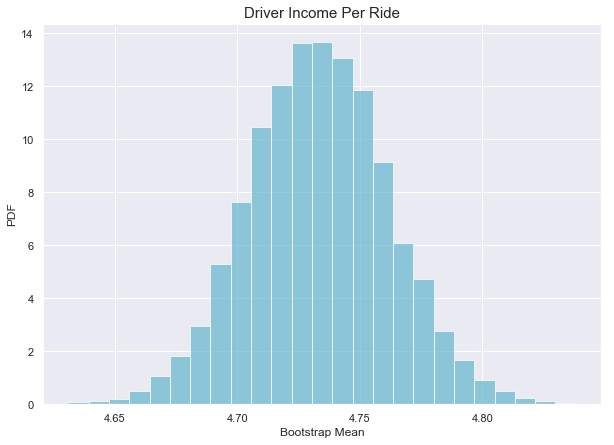

In [95]:
pooled_reps = bootstrap_plot(df['Income'], df, title='Driver Income Per Ride')

The actual mean is: 4.733329762367993
The boostrapped mean is: 4.73335450442478
The standard error of the mean is: 0.028325339449584243
The standard deviation of the bootstrapped mean is: 0.059358212235929034
We are 95% confident that the true mean is captured by the following interval: [4.61767833 4.85192665]
We are 99% confident that the true mean is captured by the following interval: [4.58515329 4.88987334]


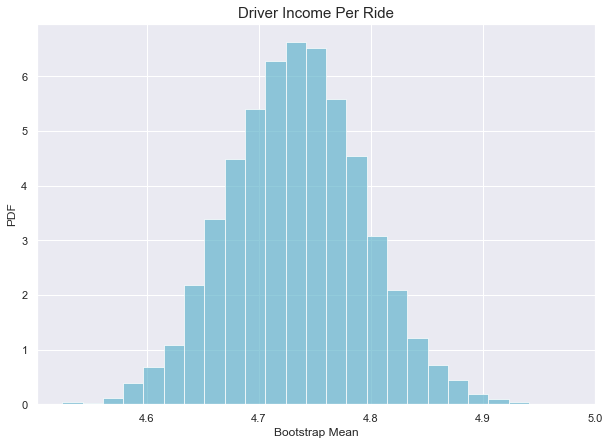

In [96]:
pooled_reps = bootstrap_plot(df['Income'], df_pooled, title='Driver Income Per Ride')

The actual mean is: 0.2891846264063083
The boostrapped mean is: 0.28917235303319483
The standard error of the mean is: 0.004398039880228639
The standard deviation of the bootstrapped mean is: 0.009207956077301392
We are 95% confident that the true mean is captured by the following interval: [0.27764804 0.31232073]
We are 99% confident that the true mean is captured by the following interval: [0.27538276 0.32320193]


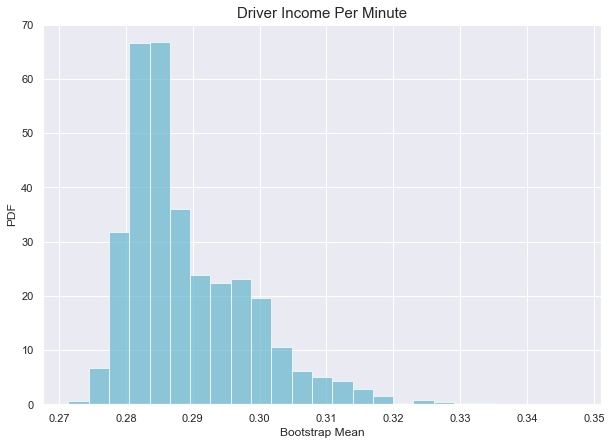

In [97]:
pooled_reps = bootstrap_plot(df['Income_Per_Minute'], df_pooled, title = 'Driver Income Per Minute')

## Time

In [98]:
df['month'] = df['Trip Start Timestamp'].dt.month
df['year'] = df['Trip Start Timestamp'].dt.year
df['hour'] = df['Trip Start Timestamp'].dt.hour
df['minute'] = df['Trip Start Timestamp'].dt.minute
df['dayofweek'] = df['Trip Start Timestamp'].dt.dayofweek

In [99]:
df.sort_values(by=['year'])

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Income,Income_Per_Minute,month,year,hour,minute,dayofweek
22748,bc574c91a1bd4a4795cf2588d97e5d161094dd0d,2018-12-01 13:30:00,2018-12-01 13:45:00,881.0,2.8,1.703124e+10,1.703183e+10,24.0,28.0,10.0,...,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),7.500,0.510783,12,2018,13,30,5
34526,4e1e0634630eac9d0ef3ce42ee515e977e4fb72b,2018-11-17 11:15:00,2018-11-17 11:45:00,1823.0,5.8,1.703108e+10,1.703122e+10,8.0,22.0,5.0,...,41.920802,-87.694532,POINT (-87.6945323419 41.9208017043),1.250,0.041141,11,2018,11,15,5
34525,4e17224e8f9e05aa72a70d09d2662426e2cfdc00,2018-12-18 07:00:00,2018-12-18 07:15:00,400.0,1.0,1.703108e+10,1.703184e+10,8.0,32.0,5.0,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),1.250,0.187500,12,2018,7,0,1
34524,4e0f87b1de1cd8e02a7725daa2cd7e724d76e114,2018-12-20 13:15:00,2018-12-20 13:30:00,713.0,1.7,1.703108e+10,1.703183e+10,8.0,28.0,7.5,...,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),4.125,0.347125,12,2018,13,15,3
34523,4e088d211dc5edbf2fe908b3e94331a04b9efc3e,2018-12-14 21:15:00,2018-12-14 21:30:00,1185.0,8.5,1.703184e+10,1.703108e+10,31.0,8.0,15.0,...,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),8.750,0.443038,12,2018,21,15,4
12799,714bbfbcc4e4145d5a12c62e7a124ea59ed19d22,2018-12-17 21:30:00,2018-12-17 21:45:00,313.0,0.7,1.703184e+10,1.703184e+10,32.0,32.0,2.5,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),-0.625,-0.119808,12,2018,21,30,0
34521,4df92529058a6fad8248dbf93d61f40b7cc3880b,2018-12-14 19:45:00,2018-12-14 20:00:00,679.0,2.7,1.703184e+10,1.703184e+10,28.0,32.0,7.5,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),4.125,0.364507,12,2018,19,45,4
12802,715187d9d77c6c8f138df676aa489ff5b7e8d219,2018-11-14 05:15:00,2018-11-14 05:45:00,1788.0,10.1,1.703113e+10,1.703108e+10,13.0,8.0,17.5,...,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),13.125,0.440436,11,2018,5,15,2
34520,4df1d0142e992b65296529dd9f07f6bfe41d95be,2018-12-09 20:45:00,2018-12-09 21:00:00,383.0,1.4,1.703102e+10,1.703183e+10,2.0,1.0,0.0,...,42.001698,-87.673574,POINT (-87.6735740325 42.0016981937),-2.500,-0.391645,12,2018,20,45,6
34519,4dea7860703ebf65a23020e480d0bfd5791c9d62,2018-11-16 11:30:00,2018-11-16 11:45:00,1121.0,2.7,1.703183e+10,1.703108e+10,28.0,8.0,10.0,...,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),5.000,0.267618,11,2018,11,30,4


In [100]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
dr = pd.date_range(start='2018-01-01', end='2019-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
df['holiday'] = df['Trip Start Timestamp'].dt.date.astype('datetime64').isin(holidays)

In [101]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Longitude,Dropoff Centroid Location,Income,Income_Per_Minute,month,year,hour,minute,dayofweek,holiday
3,10cda8e401a74790b1deb7a9de194bf526b28fcc,2019-01-14 04:15:00,2019-01-14 04:15:00,708.0,2.6,1.703184e+10,1.703184e+10,34.0,31.0,7.5,...,-87.663529,POINT (-87.6635286858 41.8474315472),5.625,0.476695,1,2019,4,15,0,False
4,10cfaf1cb74d19ac8e71937512b7b526df49cb2c,2018-11-05 00:30:00,2018-11-05 00:45:00,539.0,1.9,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,-87.626211,POINT (-87.6262105324 41.8991556134),1.250,0.139147,11,2018,0,30,0,False
6,10d3aa79da58b171bd396c8d7c3ba3c1bdf3b357,2019-03-07 14:30:00,2019-03-07 14:30:00,292.0,0.7,1.703108e+10,1.703132e+10,8.0,32.0,2.5,...,-87.620993,POINT (-87.6209929134 41.8849871918),1.325,0.272260,3,2019,14,30,3,False
7,10d5b9baaea513f4caf77d0d2f220e99d03d8fd8,2018-12-04 13:45:00,2018-12-04 14:00:00,635.0,2.6,1.703183e+10,1.703183e+10,3.0,6.0,7.5,...,-87.668794,POINT (-87.6687944391 41.9451704528),3.125,0.295276,12,2018,13,45,1,False
8,10d7a658f86940de9467bb578166fa86f9ead3c3,2018-12-07 22:30:00,2018-12-07 22:30:00,553.0,1.4,1.703108e+10,1.703108e+10,8.0,8.0,5.0,...,-87.637844,POINT (-87.6378442095 41.8932163595),3.750,0.406872,12,2018,22,30,4,False


In [102]:
df.groupby(['dayofweek']).mean()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Income,Income_Per_Minute,month,year,hour,minute,holiday
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,987.517220,4.807260,1.703139e+10,1.703140e+10,23.398076,24.238287,9.629227,0.511325,2.824024,12.964576,...,-87.657467,41.896974,-87.660922,4.909221,0.267080,5.712690,2018.612163,13.890475,22.837419,0.153273
1,972.723234,4.411038,1.703138e+10,1.703139e+10,22.875552,23.275938,9.137003,0.463852,2.624487,12.225342,...,-87.656790,41.896693,-87.657802,4.692118,0.271459,5.331126,2018.642384,14.026490,22.971854,0.058775
2,978.718945,4.558086,1.703138e+10,1.703139e+10,22.844795,23.559119,9.375510,0.495787,2.638171,12.509467,...,-87.656459,41.897121,-87.658197,4.889248,0.286183,5.527861,2018.627616,14.463713,22.620277,0.000000
3,995.593397,4.519607,1.703138e+10,1.703139e+10,22.908412,23.437359,9.537540,0.483718,2.728103,12.749360,...,-87.656918,41.897750,-87.658606,4.908770,0.291255,5.587517,2018.616915,14.771370,22.510176,0.018996
4,962.481124,4.226123,1.703135e+10,1.703136e+10,21.953480,22.001968,9.307568,0.490785,2.645981,12.444335,...,-87.656639,41.899526,-87.657326,4.825480,0.283236,5.780104,2018.607980,15.399714,22.699946,0.000000
5,858.926817,3.914356,1.703131e+10,1.703131e+10,19.391297,19.802044,8.797594,0.450305,2.588029,11.835927,...,-87.655158,41.904461,-87.656388,4.460471,0.311977,5.692270,2018.621889,14.837976,22.797923,0.000000
6,851.910952,4.653571,1.703132e+10,1.703132e+10,19.982857,20.450000,9.108333,0.479048,2.726150,12.313531,...,-87.659769,41.907232,-87.662112,4.584148,0.296882,5.849524,2018.602619,11.965952,21.935714,0.000000


In [103]:
df.groupby(['dayofweek']).count()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Income,Income_Per_Minute,month,year,hour,minute,holiday
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,3223,3223,3223,3223,3223,3223,3223,3223,3223,3223,...,3223,3223,3223,3223,3223,3223,3223,3223,3223,3223
1,3624,3624,3624,3624,3624,3624,3624,3624,3624,3624,...,3624,3624,3624,3624,3624,3624,3624,3624,3624,3624
2,3679,3679,3679,3679,3679,3679,3679,3679,3679,3679,...,3679,3679,3679,3679,3679,3679,3679,3679,3679,3679
3,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422,...,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422
4,5589,5589,5589,5589,5589,5589,5589,5589,5589,5589,...,5589,5589,5589,5589,5589,5589,5589,5589,5589,5589
5,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,...,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067
6,4200,4200,4200,4200,4200,4200,4200,4200,4200,4200,...,4200,4200,4200,4200,4200,4200,4200,4200,4200,4200


In [104]:
df.groupby(['Shared Trip Authorized']).mean()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Income,Income_Per_Minute,month,year,hour,minute,dayofweek,holiday
Shared Trip Authorized,,,,,,,,,,,,,,,,,,,,,
False,890.156400,4.306417,1.703134e+10,1.703136e+10,21.056223,21.799983,10.003992,0.567148,3.007304,13.578444,...,41.902470,-87.659203,5.062838,0.303122,5.690016,2018.615598,14.260274,22.702958,3.367720,0.025002
True,1098.435341,4.662204,1.703138e+10,1.703138e+10,23.813446,23.264059,6.621467,0.182986,1.535033,8.339486,...,41.893394,-87.656174,3.614054,0.241843,5.534399,2018.626606,14.432486,22.358693,3.139309,0.027976


In [105]:
# Randomly sample 7 elements from your dataframe
df_elements = df.sample(n=3637)
df_elements2 = df.sample(n=4853)

The actual mean is: 4.733329762367993
The boostrapped mean is: 4.731624966730822
The standard error of the mean is: 0.028325339449584243
The standard deviation of the bootstrapped mean is: 0.08322839751860314
We are 95% confident that the true mean is captured by the following interval: [4.57255853 4.8964425 ]
We are 99% confident that the true mean is captured by the following interval: [4.52641132 4.95204097]


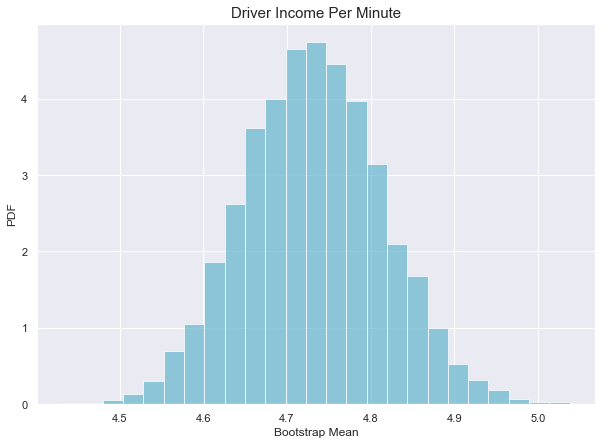

array([4.66229722, 4.69337366, 4.75964669, ..., 4.73940335, 4.79493126,
       4.79026945])

In [106]:
bootstrap_plot(df['Income'], df_elements, title = 'Driver Income Per Minute')

The actual mean is: 4.733329762367993
The boostrapped mean is: 4.733985363692562
The standard error of the mean is: 0.028325339449584243
The standard deviation of the bootstrapped mean is: 0.0709956813192463
We are 95% confident that the true mean is captured by the following interval: [4.59534811 4.8774423 ]
We are 99% confident that the true mean is captured by the following interval: [4.5540889  4.92518982]


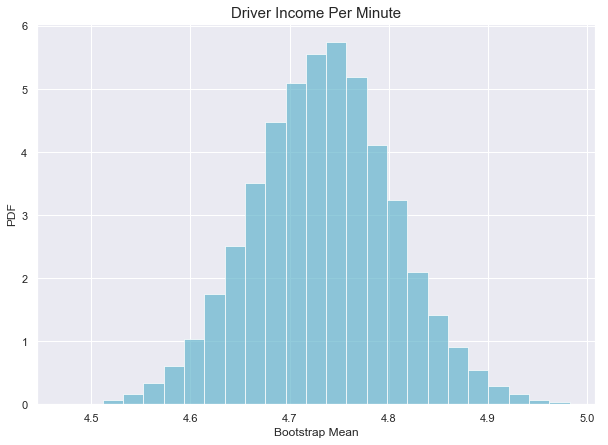

array([4.73832166, 4.74291572, 4.65521842, ..., 4.65019266, 4.6820884 ,
       4.78074799])

In [107]:
bootstrap_plot(df['Income'], df_elements2, title = 'Driver Income Per Minute')

In [108]:
df_elements.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Income,Income_Per_Minute,month,year,hour,minute,dayofweek
count,3637.000000,3637.000000,3.637000e+03,3.637000e+03,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,...,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,932.903217,4.304454,1.703134e+10,1.703136e+10,21.510586,21.976354,9.122903,0.522958,2.640685,12.286547,...,-87.655808,41.900614,-87.659110,4.724451,0.277831,5.710201,2018.612593,14.277976,22.539181,3.319769
std,640.441966,4.278478,3.189763e+05,3.335616e+05,17.052569,17.724173,6.927440,1.436914,1.612407,8.522970,...,0.046936,0.045971,0.054009,5.082852,0.261929,4.671690,0.487225,5.977312,16.704377,1.923246
min,7.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,...,-87.903040,41.670422,-87.903040,-5.675000,-5.357143,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,491.000000,1.500000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.500000,7.500000,...,-87.669838,41.880994,-87.670945,1.250000,0.164009,2.000000,2018.000000,10.000000,15.000000,2.000000
50%,776.000000,2.900000,1.703124e+10,1.703124e+10,22.000000,22.000000,7.500000,0.000000,2.550000,10.050000,...,-87.643471,41.893216,-87.643162,3.125000,0.269763,3.000000,2019.000000,15.000000,30.000000,4.000000
75%,1190.000000,5.400000,1.703183e+10,1.703183e+10,32.000000,32.000000,10.000000,0.000000,2.550000,14.500000,...,-87.630865,41.929047,-87.631717,6.825000,0.384123,11.000000,2019.000000,19.000000,30.000000,5.000000
max,5733.000000,36.600000,1.703198e+10,1.703198e+10,77.000000,77.000000,75.000000,27.000000,12.600000,89.550000,...,-87.551994,42.021224,-87.546695,53.700000,2.045455,12.000000,2019.000000,23.000000,45.000000,6.000000


The actual mean is: 4.733329762367993
The boostrapped mean is: 4.7335283850960925
The standard error of the mean is: 0.028325339449584243
The standard deviation of the bootstrapped mean is: 0.028165822249773893
We are 95% confident that the true mean is captured by the following interval: [4.67920962 4.79052592]
We are 99% confident that the true mean is captured by the following interval: [4.66367332 4.80744648]


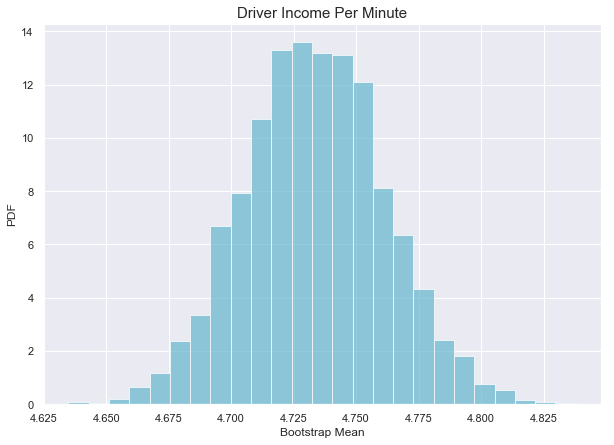

array([4.76554928, 4.69168257, 4.71833463, ..., 4.70595767, 4.72451987,
       4.80425448])

In [109]:
bootstrap_plot(df['Income'], df, title = 'Driver Income Per Minute')

The actual mean is: 0.47977535385014936
The boostrapped mean is: 0.47979414361771194
The standard error of the mean is: 0.007543262163953061
The standard deviation of the bootstrapped mean is: 0.0076719790298844
We are 95% confident that the true mean is captured by the following interval: [0.46484061 0.49506639]
We are 99% confident that the true mean is captured by the following interval: [0.46042624 0.50042219]


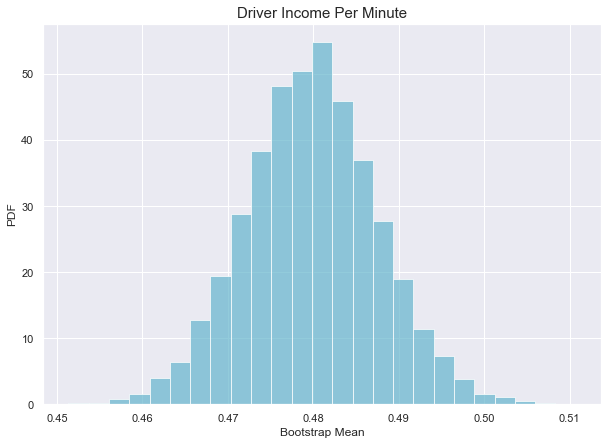

array([0.47188677, 0.47685366, 0.47747046, ..., 0.47883392, 0.47162706,
       0.46604337])

In [110]:
bootstrap_plot(df['Tip'], df, title = 'Driver Income Per Minute')

The actual mean is: 0.2778314474019828
The boostrapped mean is: 0.2778002714357679
The standard error of the mean is: 0.0043426161995770846
The standard deviation of the bootstrapped mean is: 0.0014922593409864454
We are 95% confident that the true mean is captured by the following interval: [0.2749131  0.28074261]
We are 99% confident that the true mean is captured by the following interval: [0.27396787 0.28173758]


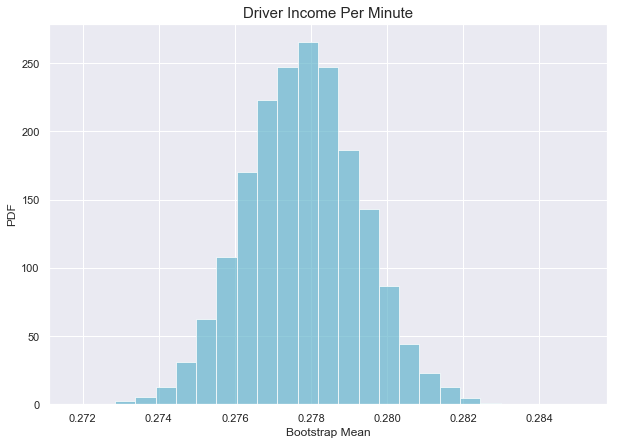

array([0.27769934, 0.27710362, 0.2776134 , ..., 0.27932075, 0.27830661,
       0.27734805])

In [112]:
bootstrap_plot(df_elements['Income_Per_Minute'], df, title = 'Driver Income Per Minute')

In [113]:
df.groupby(['hour']).mean()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Income,Income_Per_Minute,month,year,minute,dayofweek,holiday
hour,,,,,,,,,,,,,,,,,,,,,
0,717.856195,3.985619,1.703132e+10,1.703124e+10,19.054204,17.373894,8.313053,0.451327,2.553086,11.317467,...,-87.661378,41.911499,-87.656713,4.133031,0.308234,5.712389,2018.609513,20.011062,4.601770,0.050885
1,683.562883,3.728221,1.703128e+10,1.703125e+10,17.331288,16.526074,7.887270,0.317485,2.455813,10.660567,...,-87.659223,41.914471,-87.657046,3.777124,0.300634,6.128834,2018.569018,22.177914,4.786810,0.055215
2,684.945545,3.619554,1.703129e+10,1.703126e+10,14.487624,17.873762,7.939356,0.294554,2.376386,10.610297,...,-87.654456,41.913926,-87.658924,3.872686,0.308869,5.737624,2018.601485,17.524752,4.876238,0.089109
3,720.279412,4.378922,1.703126e+10,1.703134e+10,14.715686,21.759804,8.639706,0.338235,2.624804,11.602745,...,-87.657345,41.916449,-87.674961,4.193211,0.301509,5.921569,2018.588235,20.588235,4.936275,0.068627
4,983.421429,8.465714,1.703126e+10,1.703155e+10,16.235714,37.942857,14.035714,0.814286,4.136143,18.986143,...,-87.649382,41.913755,-87.733013,7.204929,0.409756,5.928571,2018.592857,23.142857,3.900000,0.035714
5,1123.970443,9.394581,1.703129e+10,1.703163e+10,18.985222,41.876847,15.504926,0.556650,4.447685,20.509261,...,-87.654674,41.911724,-87.740370,7.737660,0.370774,5.517241,2018.630542,27.857143,2.684729,0.034483
6,1165.012522,7.252594,1.703131e+10,1.703155e+10,21.375671,31.987478,12.710197,0.627907,3.564794,16.902898,...,-87.658174,41.894472,-87.690203,6.595760,0.320958,5.690519,2018.606440,27.826476,2.522361,0.021467
7,1110.196112,4.825528,1.703131e+10,1.703150e+10,22.842773,27.199493,9.904903,0.453931,2.647422,13.006255,...,-87.659808,41.888303,-87.660719,5.235186,0.328885,5.410820,2018.643280,25.638208,2.430262,0.017751
8,1109.158993,4.296685,1.703133e+10,1.703147e+10,22.805402,25.419890,9.671578,0.393493,2.531793,12.596863,...,-87.653847,41.888213,-87.652002,5.115384,0.268877,5.327195,2018.650092,23.176796,2.444444,0.022099


In [114]:
df.groupby(['hour']).count()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Income,Income_Per_Minute,month,year,minute,dayofweek,holiday
hour,,,,,,,,,,,,,,,,,,,,,
0,904,904,904,904,904,904,904,904,904,904,...,904,904,904,904,904,904,904,904,904,904
1,652,652,652,652,652,652,652,652,652,652,...,652,652,652,652,652,652,652,652,652,652
2,404,404,404,404,404,404,404,404,404,404,...,404,404,404,404,404,404,404,404,404,404
3,204,204,204,204,204,204,204,204,204,204,...,204,204,204,204,204,204,204,204,204,204
4,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
5,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
6,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,559,559,559,559,559
7,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,...,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183
8,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,...,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629
